Precise/Optimal K Value: 3
KNN Accuracy (K=3): 81.88%
Decision Tree Accuracy: 73.19%


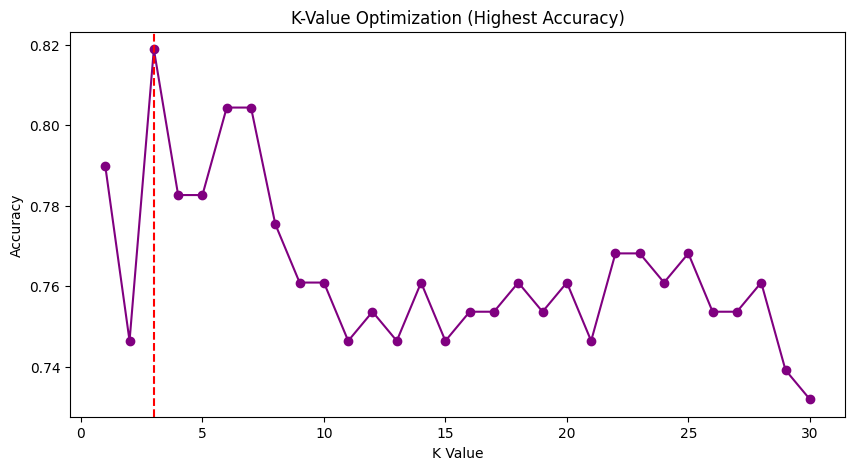

C:\Users\MRUGANK KAPSE\AppData\Local\Temp\ipykernel_27876\2069134240.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='magma')


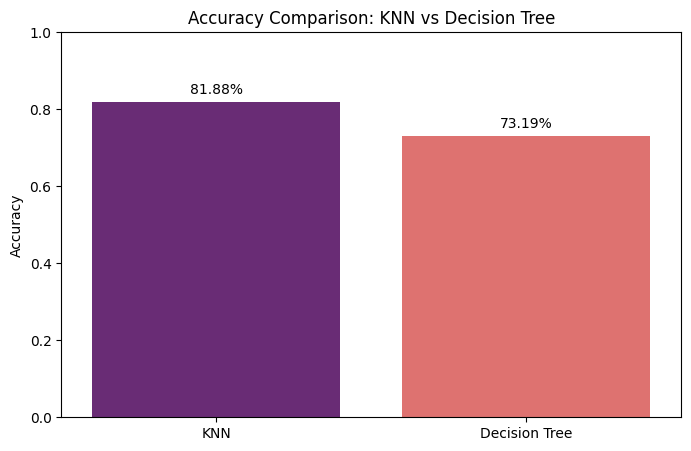

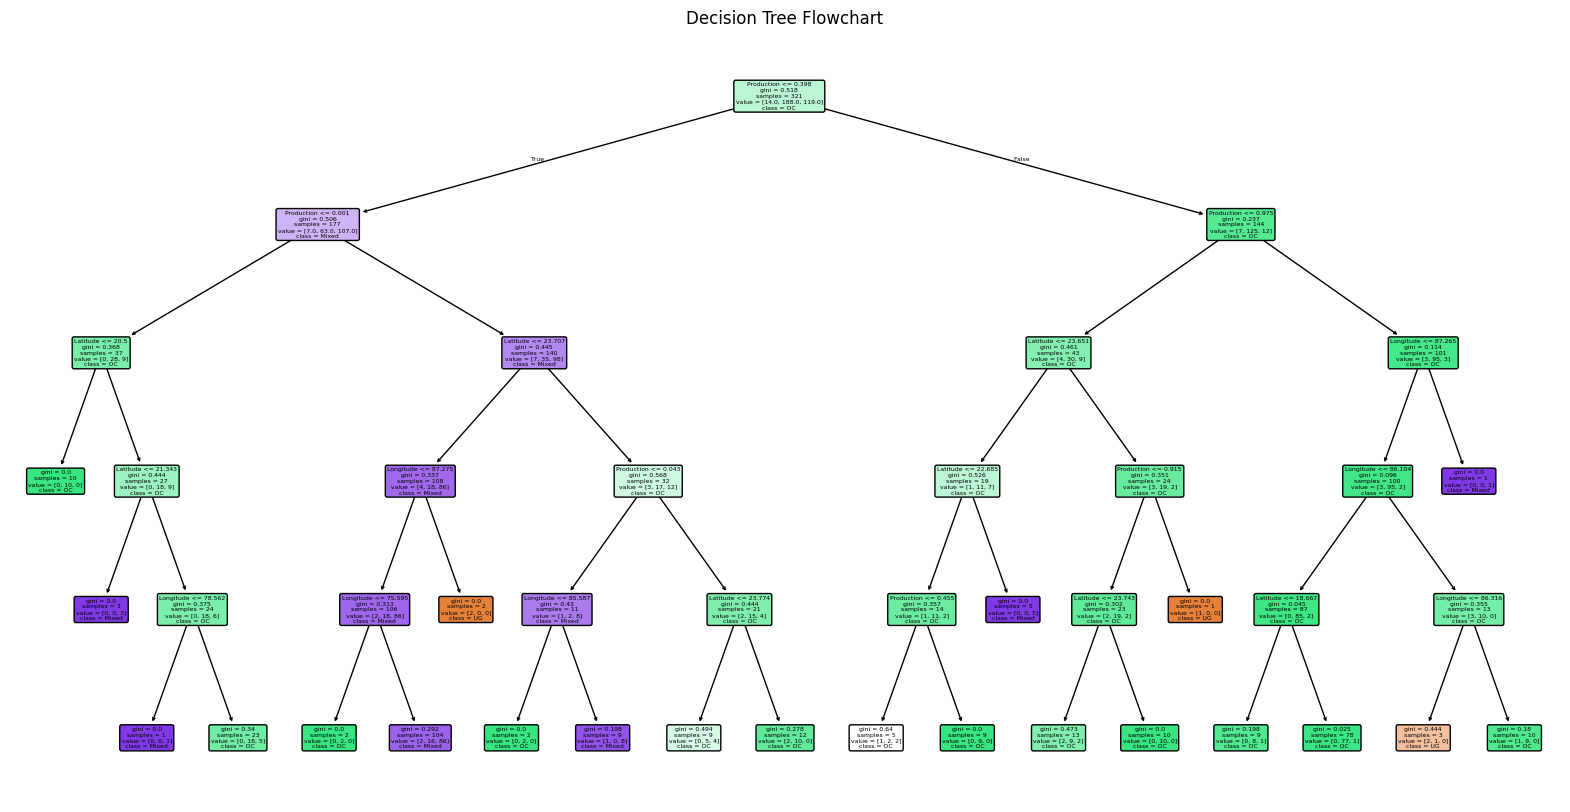

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
df = pd.read_csv(r"C:\Users\MRUGANK KAPSE\Downloads\Mines Datasheet-Tabelle 1.csv", sep=';')
df.columns = df.columns.str.strip()

def clean_numeric(val):
    if isinstance(val, str):
        val = val.replace(',', '.')
    try:
        return float(val)
    except:
        return np.nan

df['Latitude'] = df['Latitude'].apply(clean_numeric)
df['Longitude'] = df['Longitude'].apply(clean_numeric)
df['Production'] = df['Coal/ Lignite Production (MT) (2019-2020)'].apply(clean_numeric)

df_model = df.dropna(subset=['Latitude', 'Longitude', 'Production', 'Type of Mine (OC/UG/Mixed)']).copy()

X = df_model[['Latitude', 'Longitude', 'Production']]
y = df_model['Type of Mine (OC/UG/Mixed)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_values = range(1, 31)
acc_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc_scores.append(knn.score(X_test, y_test))

optimal_k = k_values[np.argmax(acc_scores)]
print(f"Precise/Optimal K Value: {optimal_k}")

knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)
knn_acc = knn_final.score(X_test, y_test)

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_acc = dt_model.score(X_test, y_test)

print(f"KNN Accuracy (K={optimal_k}): {knn_acc * 100:.2f}%")
print(f"Decision Tree Accuracy: {dt_acc * 100:.2f}%")

plt.figure(figsize=(10, 5))
plt.plot(k_values, acc_scores, marker='o', color='purple')
plt.axvline(x=optimal_k, color='red', linestyle='--')
plt.title('K-Value Optimization (Highest Accuracy)')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()



plt.figure(figsize=(8, 5))
models = ['KNN', 'Decision Tree']
accuracies = [knn_acc, dt_acc]
sns.barplot(x=models, y=accuracies, palette='magma')
plt.title('Accuracy Comparison: KNN vs Decision Tree')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v*100:.2f}%", ha='center')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=y.unique().astype(str), filled=True, rounded=True)
plt.title("Decision Tree Flowchart")
plt.show()